Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


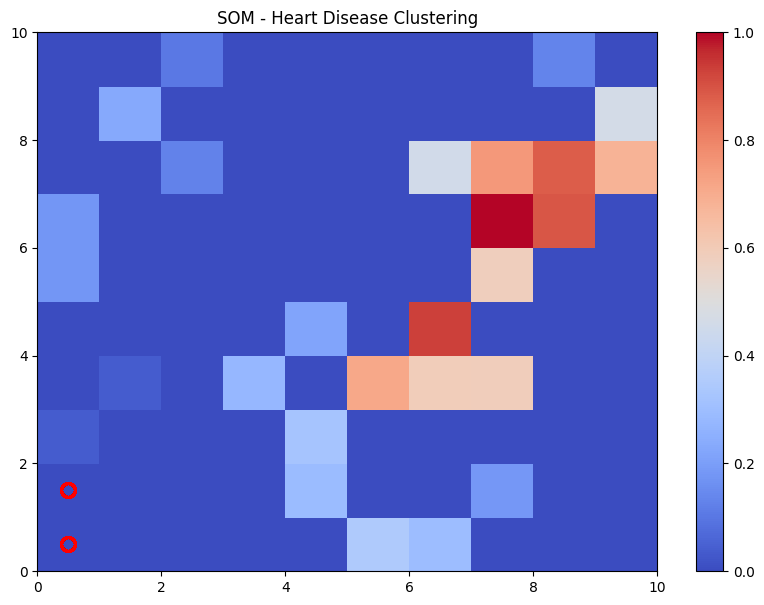

Cluster (np.int64(0), np.int64(1)): 308 points
Cluster (np.int64(0), np.int64(0)): 612 points

Number of clusters: 2


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from minisom import MiniSom

# Load the dataset
df = pd.read_csv('heart_disease_uci.csv')

# Print the column names to verify
print(df.columns)

# Apply Label Encoding to categorical features
label_encoder = LabelEncoder()

# Convert the 'thal' column (and any other categorical columns) to numeric
df['thal'] = label_encoder.fit_transform(df['thal'])

# Selecting relevant features for SOM
columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'thal']
X = df[columns].values

# Feature Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the SOM
som = MiniSom(x=10, y=10, input_len=X_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_scaled)
som.train_random(data=X_scaled, num_iteration=100)

# Visualize the SOM
plt.figure(figsize=(10, 7))
plt.pcolor(som.distance_map().T, cmap='coolwarm')  # Distance map as background
plt.colorbar()

# Add markers for each observation
for i, x in enumerate(X_scaled):
    w = som.winner(x)  # Getting the winning node
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'o', markerfacecolor='None', 
             markeredgecolor='r', markersize=10, markeredgewidth=2)

plt.title('SOM - Heart Disease Clustering')
plt.show()

# Get clusters (mapping)
mappings = som.win_map(X_scaled)

# Display information about clusters
cluster_count = 0
for key, points in mappings.items():
    print(f'Cluster {key}: {len(points)} points')
    cluster_count += 1

print(f'\nNumber of clusters: {cluster_count}')
